# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [37]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [38]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [39]:
# Print dataset

dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
# Print dataset shape
print(dataset.shape)
C,F = dataset.shape
print(f"El número de columnas es {C} y el número de filas es {F}")


(150, 5)
El número de columnas es 150 y el número de filas es 5


In [41]:
# Print column names

dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [42]:
# Drop na

print(dataset.isnull().sum())
print("No hay datos NA - NULL")

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Flower          0
dtype: int64
No hay datos NA - NULL


3. Encoding the class label categorical column: from string to num


In [43]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

<ipython-input-43-6cf562935661>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [44]:
# # Drop out non necesary columns
#dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
#dataset


5. Scatter plot of the data

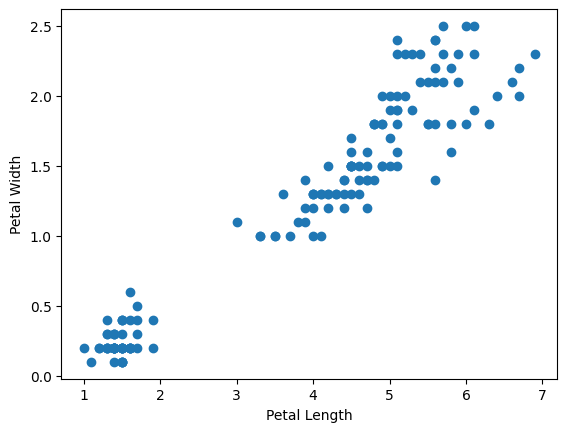

In [45]:
# Scatter plot of Petal_Length vs Petal_Width

# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


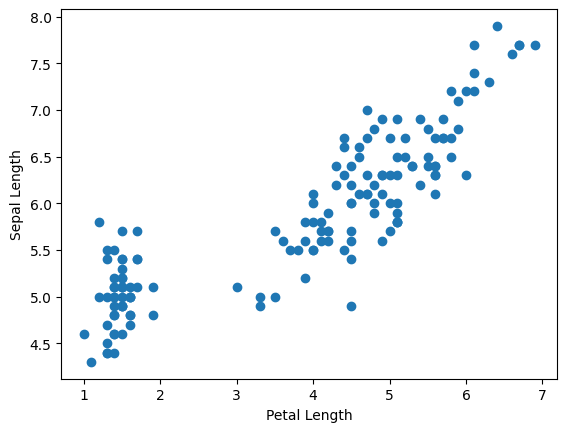

In [46]:
# Scatter plot of Petal_Length vs Sepal_Length


# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()

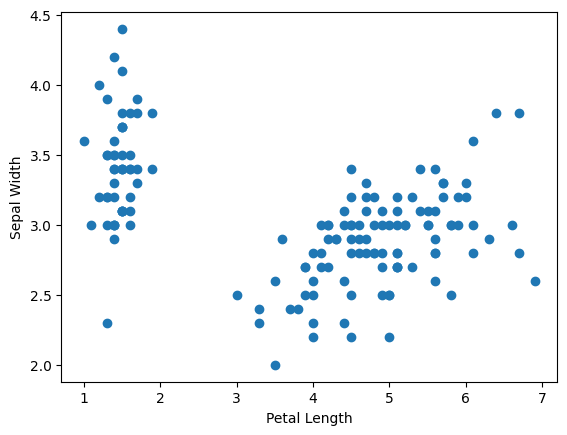

In [47]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()

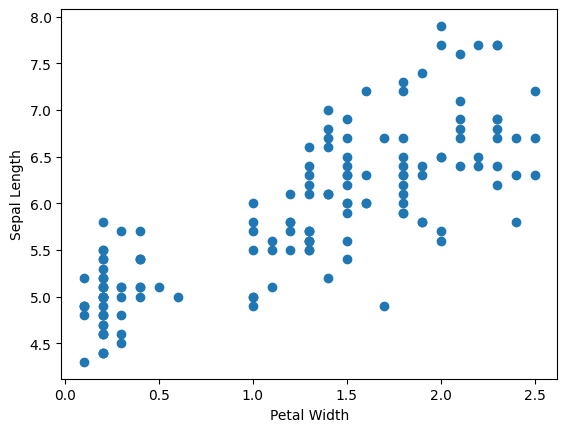

In [48]:
# Scatter plot of Petal_Width vs Sepal_Length

plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()


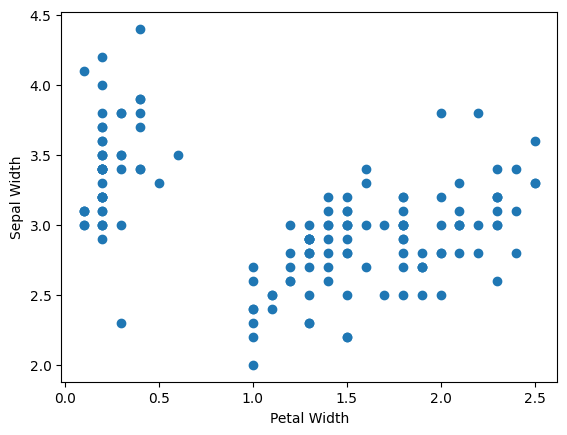

In [49]:
# Scatter plot of Petal_Width vs Sepal_Width

plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()


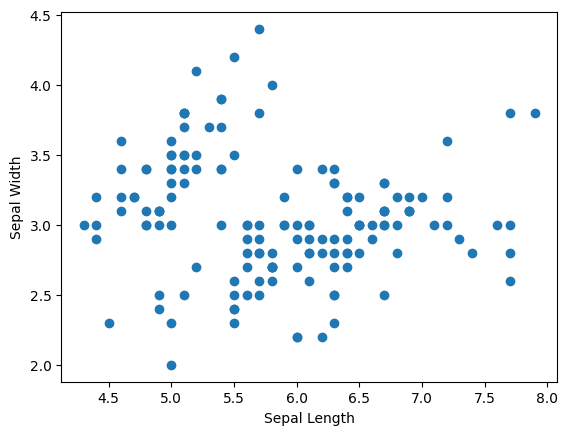

In [50]:
# Scatter plot of Sepal_Length vs Sepal_Width

plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()



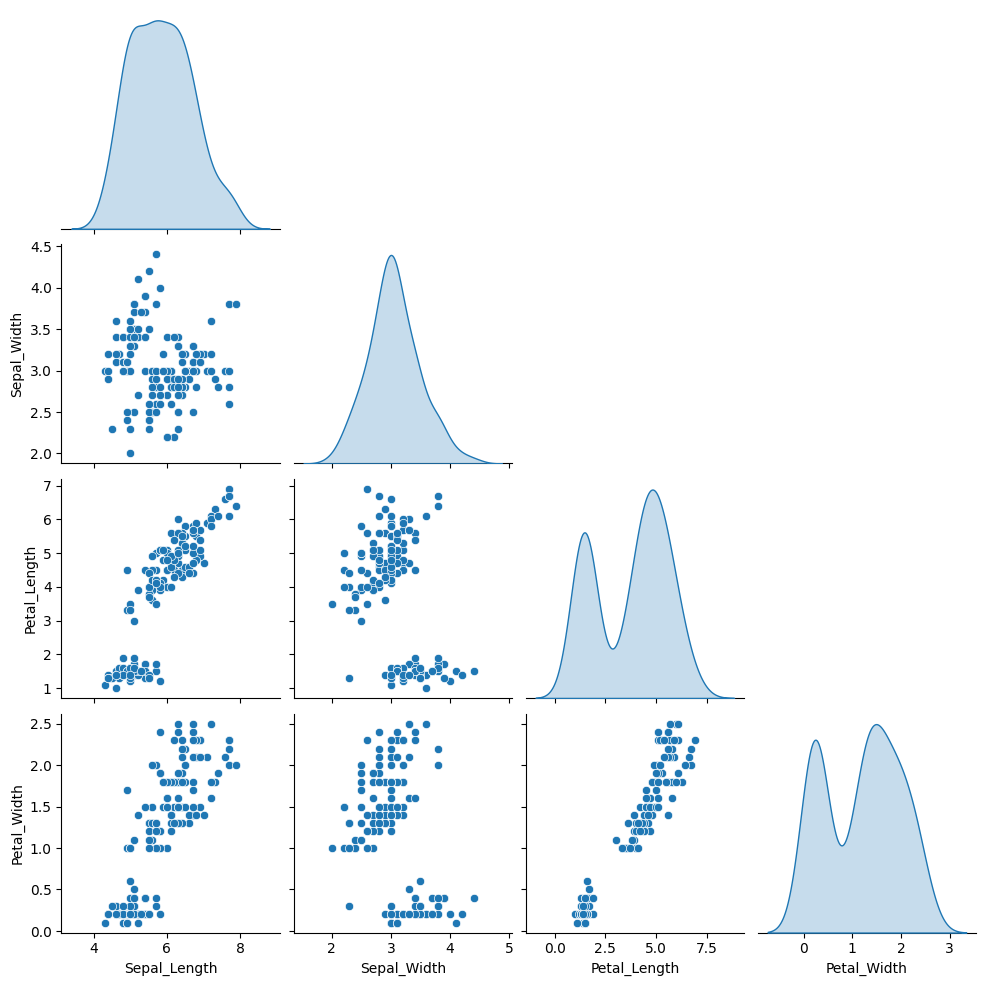

In [51]:
# Pairplot: Scatterplot of all variables (not the flower type)

g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()



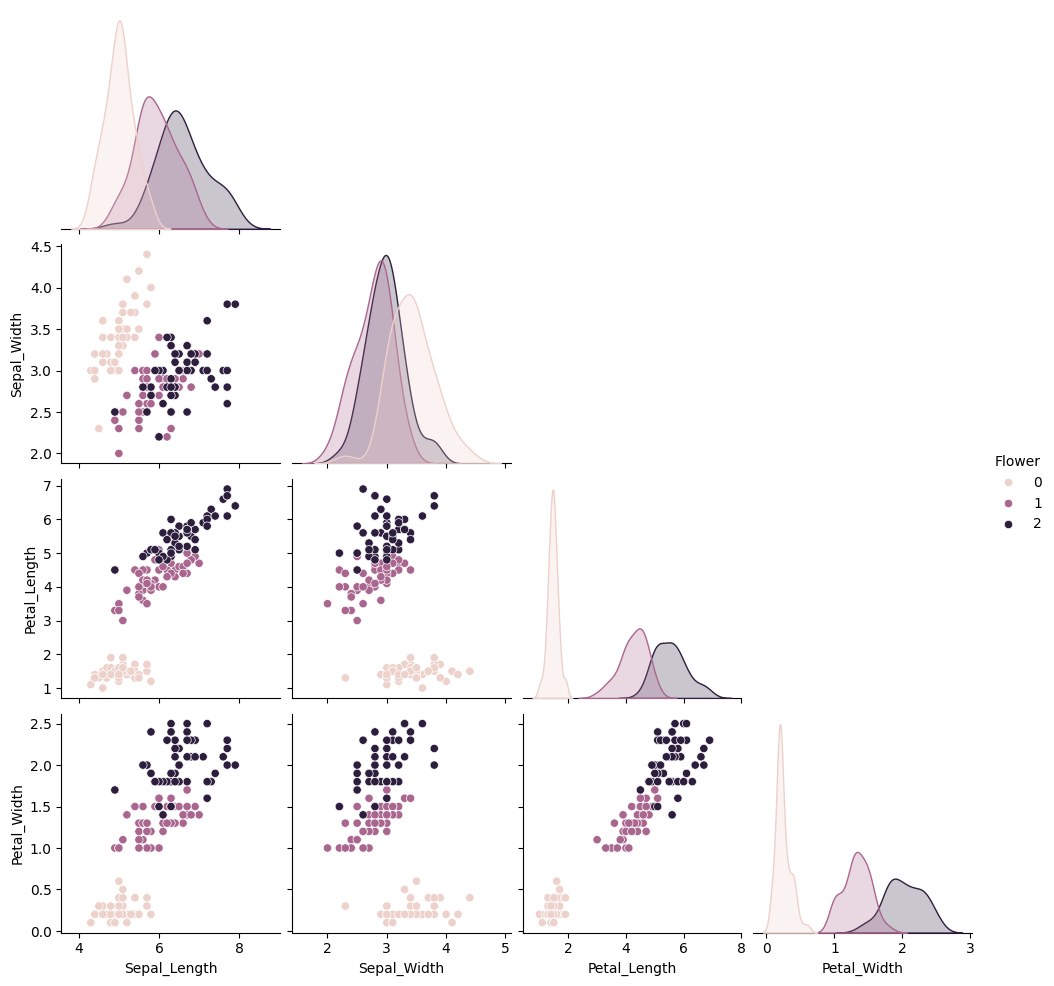

In [52]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()



6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [53]:
# Get dataframes for each real cluster

df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

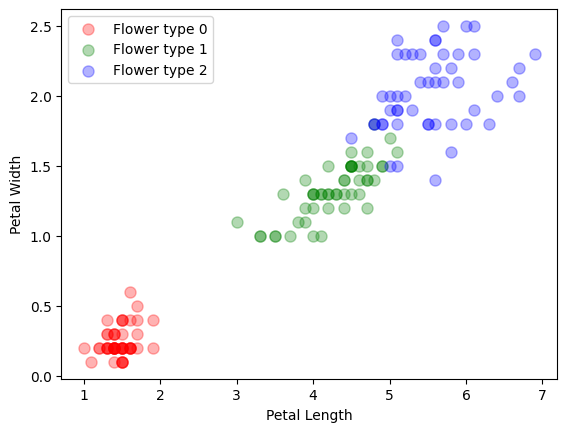

In [54]:
# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


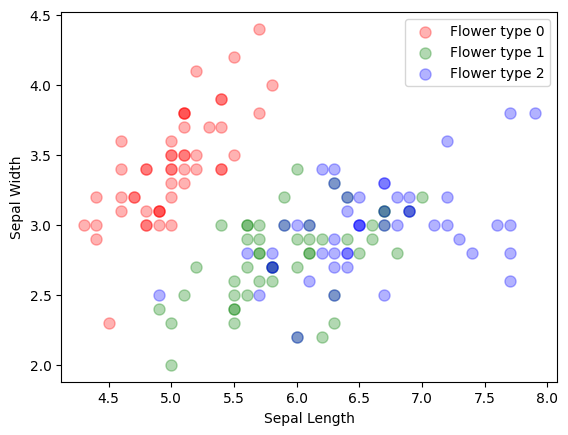

In [55]:
# Scatter plot of each real cluster for Sepal
plt.scatter(df1.Sepal_Length, df1.Sepal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [56]:
# Select variables (one, two, three, four)
x  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [57]:
# Understand the data X
print(type(x))
print(x)

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3

In [58]:
# Understand the data y
print(type(y))
print(y)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [59]:
# Calculate the number of observations in the dataset

print(f"Número de Observaciones {len(x)}")

print(f"Número de Observaciones {len(y)}")

Número de Observaciones 150
Número de Observaciones 150


In [60]:
# Calculate the number of observations for class 0
# Calculate the number of observations for class 1
# Calculate the number of observations for class 2

print(dataset["Flower"].value_counts())

Flower
0    50
1    50
2    50
Name: count, dtype: int64


# Train a classifier

## Train the classification model

In [63]:
# Import sklearn linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Dividir en datos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar el clasificador
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Precisión del modelo: 0.90


## Predict the class of a new observation

In [65]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [66]:
# Normalizar la nueva observación usando el mismo `scaler`
xnew = scaler.transform(xnew)

# Make the prediction using xnew
y_pred_new = rf.predict(xnew)

# Obtener la clase predicha
print(f"La clase predicha para la nueva observación es: {y_pred_new[0]}")

La clase predicha para la nueva observación es: 0


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [67]:
# Import sklearn train_test_split

from sklearn.model_selection import train_test_split

# Split data in train and test sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
# Number of observations in the train set
print(f"Número de observaciones en el conjunto de entrenamiento: {X_train.shape[0]}")


Número de observaciones en el conjunto de entrenamiento: 120


In [69]:
# Number of observations of each class in the train set

unique, counts = np.unique(y_train, return_counts=True)
print("Número de observaciones de cada clase en el conjunto de entrenamiento:", dict(zip(unique, counts)))


Número de observaciones de cada clase en el conjunto de entrenamiento: {np.int64(0): np.int64(40), np.int64(1): np.int64(40), np.int64(2): np.int64(40)}


In [70]:
# Number of observations in the test set

print(f"Número de observaciones en el conjunto de prueba: {X_test.shape[0]}")

Número de observaciones en el conjunto de prueba: 30


In [71]:
# Number of observations of each class in the test set

unique, counts = np.unique(y_test, return_counts=True)
print("Número de observaciones de cada clase en el conjunto de prueba:", dict(zip(unique, counts)))

Número de observaciones de cada clase en el conjunto de prueba: {np.int64(0): np.int64(10), np.int64(1): np.int64(10), np.int64(2): np.int64(10)}


## Train the classification model

In [72]:
# Initialize the classifier
rf = LogisticRegression(max_iter=200)

# Fit the model to the training data
rf.fit(X_train, y_train)


LogisticRegression(max_iter=200)

## Test the classification model

In [73]:
# Make the predictions using the test set
y_pred = rf.predict(X_test)


In [74]:

# Explore real and predicted labels
print("Etiquetas reales (y_test):", y_test)
print("Etiquetas predichas (y_pred):", y_pred)

# Mostrar las primeras 10 observaciones
print("\nPrimeras 10 observaciones de etiquetas reales y predichas:")
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f"Real: {real}, Predicho: {pred}")

Etiquetas reales (y_test): [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
Etiquetas predichas (y_pred): [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]

Primeras 10 observaciones de etiquetas reales y predichas:
Real: 0, Predicho: 0
Real: 2, Predicho: 2
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 0, Predicho: 0
Real: 2, Predicho: 2
Real: 1, Predicho: 1


## Compute the acurracy

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Define a function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

In [76]:
# Calculate total accuracy

total_accuracy = compute_accuracy(y_test, y_pred)
print(f"Precisión total: {total_accuracy:.2f}")


Precisión total: 0.97


In [77]:
# Calculate total accuracy using sklearn.metrics

total_accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f"Precisión total usando sklearn.metrics: {total_accuracy_sklearn:.2f}")

Precisión total usando sklearn.metrics: 0.97


In [78]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Compute accuracy for class 0
# Compute accuracy for class 1
# Compute accuracy for class 2
for i in range(len(cm)):
    class_accuracy = cm[i, i] / cm[i].sum()
    print(f"Precisión para la clase {i}: {class_accuracy:.2f}")

Precisión para la clase 0: 1.00
Precisión para la clase 1: 0.90
Precisión para la clase 2: 1.00


## Confussion matrix

In [79]:
# Compute confussion matrix (normalized confusion matrix)
cm = confusion_matrix(y_test, y_pred)

#Normalized

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print(f"Matriz sin normalizar{cm}|\n")
print(f"Matriz normalizada{cm_normalized}")


Matriz sin normalizar[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]|

Matriz normalizada[[1.  0.  0. ]
 [0.  0.9 0.1]
 [0.  0.  1. ]]


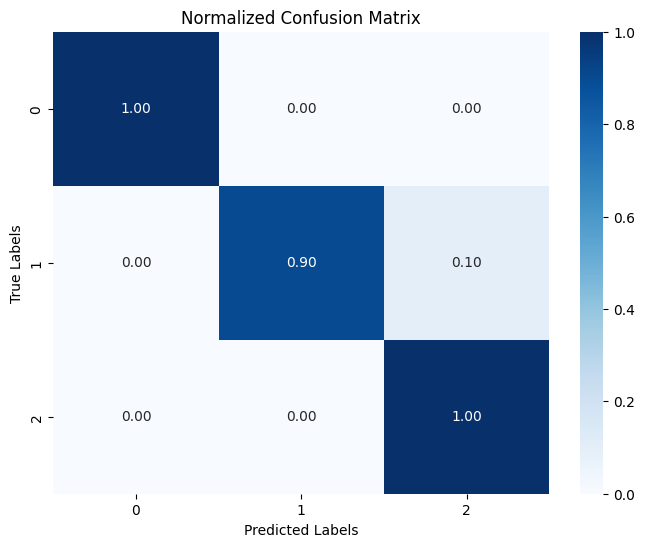

In [80]:
# Plot normalized confussion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

In [ ]:
# Split the data (same split for all cases)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Case (a): All four variables
X_all = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42, stratify=y)

clf_all = LogisticRegression(max_iter=200)
clf_all.fit(X_train_all, y_train)
y_pred_all = clf_all.predict(X_test_all)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"Precisión usando las cuatro variables: {accuracy_all:.2f}")

# Case (b): Only Petal variables
X_petal = dataset[["Petal_Length", "Petal_Width"]].values
X_train_petal, X_test_petal, y_train, y_test = train_test_split(X_petal, y, test_size=0.2, random_state=42, stratify=y)

clf_petal = LogisticRegression(max_iter=200)
clf_petal.fit(X_train_petal, y_train)
y_pred_petal = clf_petal.predict(X_test_petal)
accuracy_petal = accuracy_score(y_test, y_pred_petal)
print(f"Precisión usando solo las variables Petal: {accuracy_petal:.2f}")

# Case (c): Only Sepal variables
X_sepal = dataset[["Sepal_Length", "Sepal_Width"]].values
X_train_sepal, X_test_sepal, y_train, y_test = train_test_split(X_sepal, y, test_size=0.2, random_state=42, stratify=y)

clf_sepal = LogisticRegression(max_iter=200)
clf_sepal.fit(X_train_sepal, y_train)
y_pred_sepal = clf_sepal.predict(X_test_sepal)
accuracy_sepal = accuracy_score(y_test, y_pred_sepal)
print(f"Precisión usando solo las variables Sepal: {accuracy_sepal:.2f}")